<a href="https://colab.research.google.com/github/Anshuman776/Deep-Learning-Projects-/blob/main/TATA_StockPrediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# part 1 - Data Preprocessing

#  Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset_train = pd.read_csv("/content/NSE-TATAGLOBAL11.csv")
training_set = dataset_train.iloc[:,1:2].values

In [ ]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [ ]:
dataset_train.shape

(1235, 8)

In [ ]:
#  Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc =MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
dataset_train.shape

(1235, 8)

In [ ]:
training_set_scaled.shape

(1235, 1)

In [ ]:
# Create a data structure with 60 timesteps and 1 output
x_train =[]
y_train =[]
for i in range(60,1235):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
x_train , y_train , = np.array(x_train), np.array(y_train)

taking time steps to be 60 as catch because on sat, sundays stock market is close so how it will calculate it so as a backup and short term memory taht we have learn from this 60 previous data points

ex - we have data from 1 jan , but we will taking from march 2 and daqta in jan , feb becomes the short term data that from which we want to learn from and this **60 data are short term memory**

In [ ]:
dataset_train.shape

(1235, 8)

In [ ]:
x_train.shape

(1175, 60)

In [ ]:
x_train.shape[0]

1175

In [ ]:
x_train.shape[1]

60

In [ ]:
# Reshaping
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1175, 60, 1)

In [ ]:
#  Building the RNN

# Importing the Keras libararies and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
input_shape = (x_train.shape[1],1)

In [ ]:
input_shape

(60, 1)

In [ ]:
# Initialising the RNN
regressor = Sequential()
# units : 50,100,200,256,512,1024
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a third LSTM layer and some Droput regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the fourth lstm layer without dropout
regressor.add(LSTM(units=50))


In [ ]:
# Adding the Rnn
regressor.add(Dense(units=1))

# compiling the rnn
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')

# fitting the rnn to training set
regressor.fit(x_train, y_train, epochs=10,batch_size=32)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 14s 164ms/step - loss: 0.0393
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - loss: 0.0083
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - loss: 0.0057
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0078
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - loss: 0.0055
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - loss: 0.0047
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 197ms/step - loss: 0.0052
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.0040
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - loss: 0.0040
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 0.0049


In [51]:
# Making the Predictions and Visualising the result

# Getting the real stock price 2018
real_stock_price = dataset_test.iloc[-len(predicted_stock_price):, 1:2].values
# predicted stock price
dataset_test = pd.read_csv('/content/NSE-TATAGLOBAL11.csv')
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [52]:
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [53]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [54]:
predicted_stock_price

array([[155.3363 ],
       [155.03703],
       [154.92792],
       [155.2408 ],
       [156.20334],
       [157.99733],
       [160.72469],
       [164.39397],
       [168.93393],
       [174.19641],
       [179.97772],
       [186.04913],
       [192.18436],
       [198.18275],
       [203.87239],
       [209.09921]], dtype=float32)

In [55]:
len(X_test)

16

**Visualizing the result**

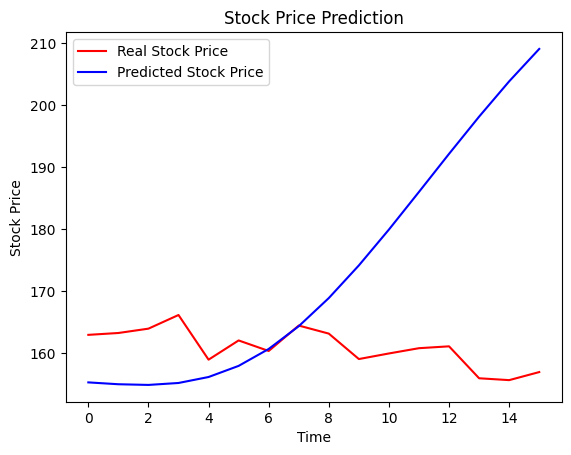

In [56]:
import matplotlib.pyplot as plt

plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

we are just comapring on the 16 data that we have create for predction and real stock prices beacuse our data set has very less numbers of rows
